# Building Networks

This tutorial demonstrates how to create a `LigandNetwork` using **konnektor**.

Note that you will need to have `openfe` installed to run this notebook, as it uses mappers and scorers provided by `openfe`. You can easily install openfe into an existing conda or mamba environment by following the install instructions [here](https://docs.openfree.energy/en/latest/installation.html#standard-installation-with-micromamba).

## 1. Create Small Molecules

First, we will create small molecule components which will be the nodes of our Ligand Network.

In [1]:
# Build Small Molecules
from konnektor.data import get_benzene_ligands
benzene_ligands = get_benzene_ligands()
benzene_ligands

[SmallMoleculeComponent(name=lig_1),
 SmallMoleculeComponent(name=lig_2),
 SmallMoleculeComponent(name=lig_3),
 SmallMoleculeComponent(name=lig_4),
 SmallMoleculeComponent(name=lig_5),
 SmallMoleculeComponent(name=lig_6),
 SmallMoleculeComponent(name=lig_7),
 SmallMoleculeComponent(name=lig_8),
 SmallMoleculeComponent(name=lig_9),
 SmallMoleculeComponent(name=lig_10),
 SmallMoleculeComponent(name=lig_11),
 SmallMoleculeComponent(name=lig_12),
 SmallMoleculeComponent(name=lig_13),
 SmallMoleculeComponent(name=lig_14),
 SmallMoleculeComponent(name=lig_15),
 SmallMoleculeComponent(name=lig_16)]

In [2]:
# choose a subset of the compounds

compounds = list(filter(lambda x: not x.name in ["lig_2", "lig_3", "lig_4", "lig_7"], get_benzene_ligands()))

## 2. Choose an Atom Mapper and Scorer

The `AtomMapper` will generate the `AtomMappings` that relate two small molecules and serve as the edges of our LigandNetwork.

The `AtomMappingScorer` will add the weights to the edges, by expressing on how difficult the transformation will be. This score is between 0, very hard to compute, and 1 for easy to compute:

In [3]:
# Build Atom Mapper and AtomMappingScorer
from openfe.setup import KartografAtomMapper, lomap_scorers
mapper = KartografAtomMapper()
scorer = lomap_scorers.default_lomap_score

##  3. Generating the LigandNetwork

After having the components setup, we can go and plan our network! Here we use the `CylicNetworkGenerator`.
But of course you can use any `NetworkGenerator` from Konnektor in exactly the same way.

In [4]:
# Plan the Network
from konnektor.network_planners import CyclicNetworkGenerator

networker = CyclicNetworkGenerator(mappers=mapper, scorer=scorer, n_processes=1)

network = networker.generate_ligand_network(compounds)
network

<LigandNetwork-2eb69187455ba4279608ea0c57788497>

## 4. Visualizing the LigandNetwork

There are several ways to visualize a network generated with **konnektor**.

First, you can translate the network into a `matplotlib.pyplot.Figure` with the function `draw_ligand_network`.

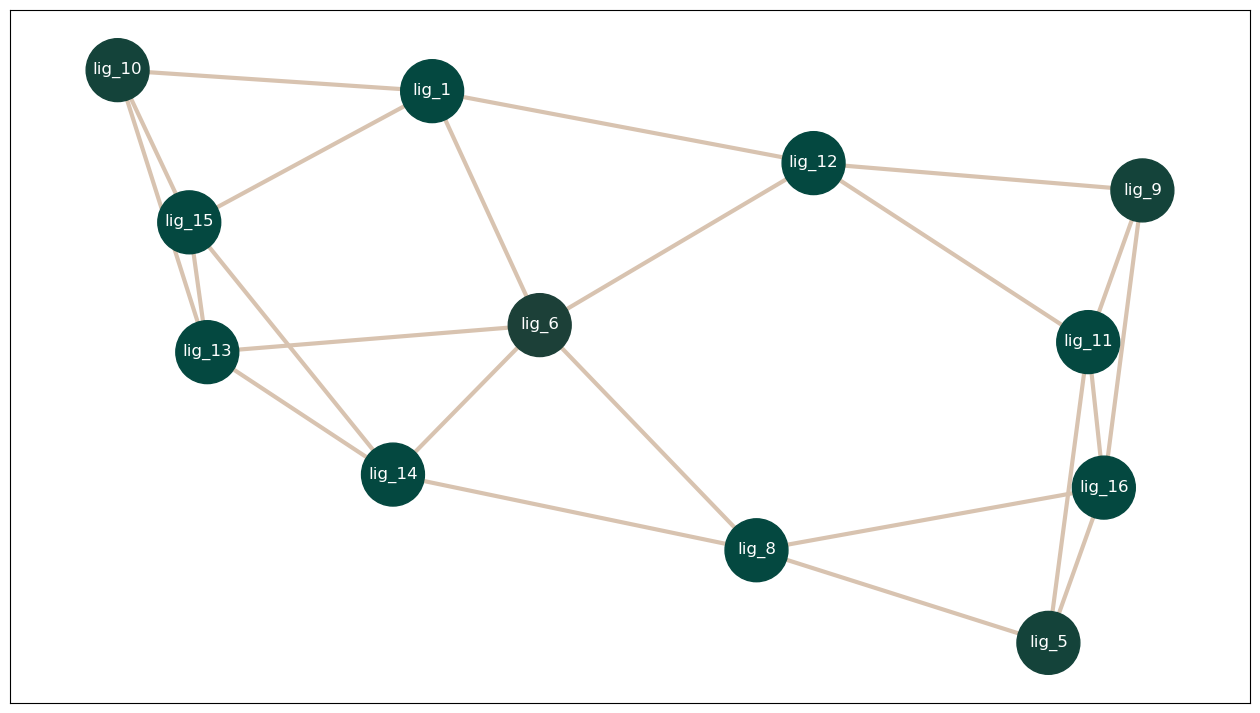

In [5]:
# Visualize the generated network
from konnektor.visualization import draw_ligand_network
fig = draw_ligand_network(network=network)


Alternatively, you can visualize the network with **konnektor**'s interactive IPython widget.
(This will only work properly in an interactive notebook).

In [6]:
# Visualize the generated network in a widget
from konnektor.visualization import draw_network_widget
widget = draw_network_widget(network=network)


interactive(children=(Dropdown(description='layout', index=4, options=('dagre', 'cola', 'breadthfirst', 'conce…